In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB   #가우시안 나이브 베이즈 참조 자료형
from sklearn import metrics
from sklearn.metrics import accuracy_score

np.random.seed(5)  # 랜덤값 고정

## iris 데이터 시각화

In [3]:
# iris 불러오기
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns = dataset.feature_names) # 기존 데이터에 담겨져있는 컬럼명으로 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 분류값 데이터프레임에 저장
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [7]:
# 숫자인 분류값의 이해를 돕기 위해 문자로 변경

df.target = df.target.map({0:'setosa', 1:'vesicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### iris 데이터의 분포도 확인
- iris 데이터의 분포도를 확인해보도록 하겠습니다. 결과를 통해서, iris의 데이터 분포도가 정규 분포(Gaussian Distribution)를 이루고 있는지 확인을 합니다.

In [9]:
# 분류값 별로 데이터 프레임을 나눕니다.
setosa_df = df[df.target == 'setosa']
vesicolor_df = df[df.target == 'vesicolor']
virginica_df = df[df.target == 'virginica']

#### sepal length (cm)

<AxesSubplot:>

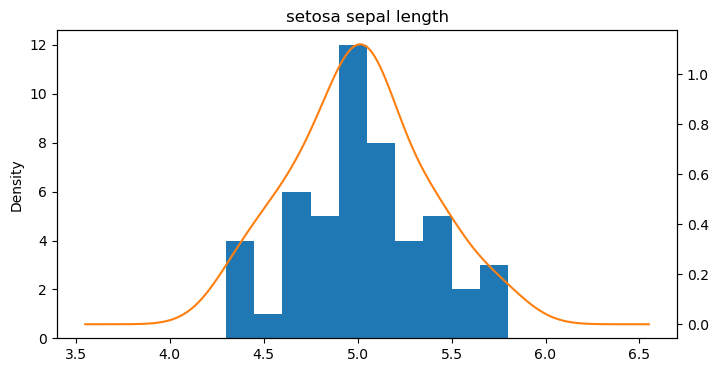

In [13]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'setosa sepal length',
                                    figsize = (8, 4))  #kde=밀도로 표현 

#### vesicolor sepal length (cm)

<AxesSubplot:>

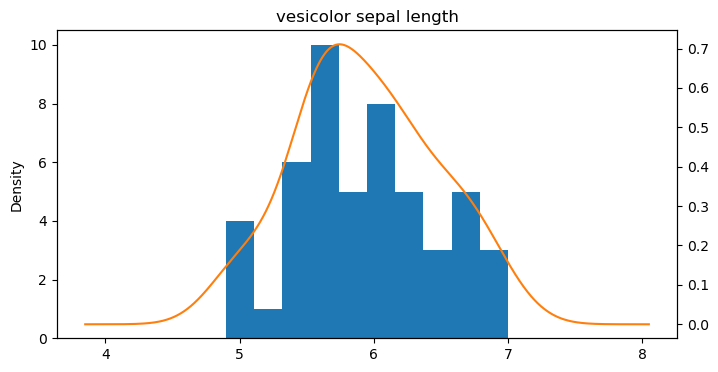

In [14]:
ax = vesicolor_df['sepal length (cm)'].plot(kind='hist')
vesicolor_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'vesicolor sepal length',
                                    figsize = (8, 4))  #kde=밀도로 표현 

#### virginica sepal length (cm)

<AxesSubplot:>

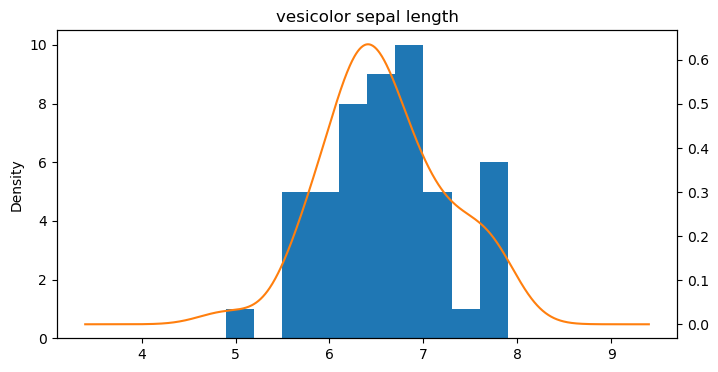

In [15]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'vesicolor sepal length',
                                    figsize = (8, 4))  #kde=밀도로 표현 

# 나머지 9개도 꼭 하기!!

## 데이터를 학습데이터와 테스트데이터로 나누기

In [16]:
# 20%를 테스트 데이터로 분류

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size= 0.2) #훈련 - 실습 데이터 분류

### Gaussian naive bayes 분류하기

In [17]:
# 학습데이터로 모델을 학습합니다
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다.
predicted = model.predict(X_test)

In [18]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

